In [210]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [211]:
df1= pd.read_csv("/content/drive/MyDrive/Classroom/Machine Learning M.Tech Data Science and Analytics/CarPrice_Assignment.csv")
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [212]:
df1.shape

(205, 26)

In [213]:
df1.groupby('aspiration')['aspiration'].agg('count')

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64

In [214]:
df1.groupby('doornumber')['doornumber'].agg('count')

doornumber
four    115
two      90
Name: doornumber, dtype: int64

In [215]:
df1.groupby('enginelocation')['enginelocation'].agg('count')

enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64

In [216]:
#There are certain varibales which doesnot bother the car price, Drop them.
df2 = df1.drop(['aspiration','doornumber','enginelocation','wheelbase','carlength','carwidth','carheight','carbody','drivewheel'],axis='columns')


In [217]:
df2.head(10)

,car_ID,symboling,CarName,fueltype,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [218]:
df2.shape

(205, 17)

In [219]:
#find whether there is null values
df2.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [220]:
df2.groupby('CarName')['CarName'].agg('count')

CarName
Nissan versa                1
alfa-romero Quadrifoglio    1
alfa-romero giulia          1
alfa-romero stelvio         1
audi 100 ls                 1
                           ..
volvo 246                   1
volvo 264gl                 2
volvo diesel                1
vw dasher                   1
vw rabbit                   1
Name: CarName, Length: 147, dtype: int64

In [221]:
#for Using only car company name 
df2['carnames']=df2['CarName'].apply(lambda x:(x.split(' ')[0]))

In [222]:
df2

,car_ID,symboling,CarName,fueltype,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carnames
0,1,3,alfa-romero giulia,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [223]:
#Now we don't need CarName (first column)
df3 =df2.drop(['CarName'],axis='columns')
df3

,car_ID,symboling,fueltype,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carnames
0,1,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [259]:
df4=df3.copy()
df4['averagemileage']=(df3['citympg']+df3['highwaympg'])/2
df4.head()


,car_ID,symboling,fueltype,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carnames,averagemileage
0,1,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,24.0
1,2,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,24.0
2,3,1,gas,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.5
3,4,2,gas,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,27.0
4,5,2,gas,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,20.0


In [262]:
#drop highway mileage and city mileage
df5 = df4.drop(['citympg','highwaympg'],axis='columns')
df5

,car_ID,symboling,fueltype,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carnames,averagemileage
0,1,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,24.0
1,2,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,24.0
2,3,1,gas,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.5
3,4,2,gas,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,27.0
4,5,2,gas,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,volvo,25.5
201,202,-1,gas,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,volvo,22.0
202,203,-1,gas,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,volvo,20.5
203,204,-1,diesel,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,volvo,26.5


In [263]:
df5.carnames=df5.carnames.apply(lambda x:x.strip())
car_stats = df5.groupby('carnames')['carnames'].agg('count').sort_values(ascending=False)
car_stats

carnames
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: carnames, dtype: int64

In [264]:
car_status_lessthanequal_1 = car_stats[car_stats<=1]
car_status_lessthanequal_1


carnames
porcshce     1
toyouta      1
vokswagen    1
mercury      1
Nissan       1
Name: carnames, dtype: int64

In [265]:
#@title
df5.carnames= df5.carnames.apply(lambda x: 'other' if x in car_status_lessthanequal_1 else x)
df5.carnames.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'other',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'],
      dtype=object)

In [266]:
df5.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [267]:
df5.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [268]:
df5.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [269]:
df5.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [270]:
df5.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [271]:
df5.compressionratio.unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [272]:
dummies=pd.get_dummies(df5['carnames'],drop_first= True)
dummies.head()

df5= pd.concat([df5,dummies],axis=1)
df5.head()

dummies1=pd.get_dummies(df5['symboling'],drop_first= True)
df5= pd.concat([df5,dummies1],axis=1)

dummies2=pd.get_dummies(df5['fueltype'],drop_first= True)
df5= pd.concat([df5,dummies2],axis=1)

dummies3=pd.get_dummies(df5['enginetype'],drop_first= True)
df5= pd.concat([df5,dummies3],axis=1)

dummies4=pd.get_dummies(df5['cylindernumber'],drop_first= True)
df5= pd.concat([df5,dummies4],axis=1)

dummies5=pd.get_dummies(df5['fuelsystem'],drop_first= True)
df5= pd.concat([df5,dummies5],axis=1)

In [273]:
df5.head()

,car_ID,symboling,fueltype,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,gas,2548,dohc,four,130,mpfi,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,gas,2823,ohcv,six,152,mpfi,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,gas,2337,ohc,four,109,mpfi,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,gas,2824,ohc,five,136,mpfi,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [274]:
#Now drop non numeric values
df6= df5.drop(['symboling','fueltype','enginetype','cylindernumber','fuelsystem','carnames','car_ID'], axis='columns')

In [275]:
#Preparing independant variable
X= df6.drop('price',axis='columns')
X.head()

,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,averagemileage,audi,bmw,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,2548,130,3.47,2.68,9.0,111,5000,24.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2548,130,3.47,2.68,9.0,111,5000,24.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2823,152,2.68,3.47,9.0,154,5000,22.5,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2337,109,3.19,3.40,10.0,102,5500,27.0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2824,136,3.19,3.40,8.0,115,5500,20.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [276]:
#Preparing dependant variable
Y= df6.price
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [277]:
#splitting training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [278]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.6803955948731879

In [279]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(Y_train, X_train_lm).fit()

lr_1.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const              -9.757488e+03
curbweight          4.923588e+00
enginesize          6.455533e+01
boreratio          -8.559143e+02
stroke             -2.424377e+03
compressionratio    2.489064e+02
horsepower          7.314781e+01
peakrpm             1.241879e+00
averagemileage      1.038218e+02
audi                1.028265e+03
bmw                 5.185431e+03
buick               3.249074e+03
chevrolet          -7.077024e+02
dodge              -3.286217e+03
honda              -1.922689e+03
isuzu              -2.400489e+03
jaguar              4.339721e+03
maxda              -2.942479e+03
mazda              -1.081950e+03
mitsubishi         -3.715082e+03
nissan             -2.832578e+03
other              -3.417902e+03
peugeot            -5.024389e+02
plymouth           -3.712424e+03
porsche             1.170622e+03
renault            -3.988172e+03
saab               -1.676634e+03
subaru             -1.194582e+04
toyota             -3.230034e+03
volkswagen         -2.397989e+03
volvo     

In [280]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     57.18
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.81e-61
Time:                        16:38:45   Log-Likelihood:                -1446.1
No. Observations:                 164   AIC:                             2990.
Df Residuals:                     115   BIC:                             3142.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9757.4879   6840.484  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [281]:
# R-squared value is 96%
#Analysing P value , there are varibales to be dropped
#Calculate VIF
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [282]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
42,rotor,inf
21,peugeot,inf
50,4bbl,inf
38,l,inf
48,two,inf
46,three,inf
11,chevrolet,inf
36,gas,3040.69
51,idi,551.45
4,compressionratio,166.07


In [283]:
#compressionratio has higher P value and VIF value, so dropping Compression Ratio
X= X_train.drop('compressionratio',axis='columns')

In [284]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(Y_train,X_train_lm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [285]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     58.79
Date:                Sun, 08 May 2022   Prob (F-statistic):           2.61e-62
Time:                        16:38:58   Log-Likelihood:                -1446.2
No. Observations:                 164   AIC:                             2988.
Df Residuals:                     116   BIC:                             3137.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7990.6398   5653.945     -1.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [286]:
# Create VIFs agian
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
41,rotor,inf
20,peugeot,inf
49,4bbl,inf
47,two,inf
45,three,inf
10,chevrolet,inf
37,l,inf
35,gas,2858.50
50,idi,254.51
43,four,124.86


In [287]:
#dropping Bore ratio
X=X.drop('boreratio',axis='columns')


In [288]:
X_train_lm= sm.add_constant(X)
lr_4 = sm.OLS(Y_train,X_train_lm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [289]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     60.52
Date:                Sun, 08 May 2022   Prob (F-statistic):           3.51e-63
Time:                        16:39:06   Log-Likelihood:                -1446.3
No. Observations:                 164   AIC:                             2987.
Df Residuals:                     117   BIC:                             3132.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8434.9963   5471.861     -1.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [290]:
Y_train_price = lr_4.predict(X_train_lm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

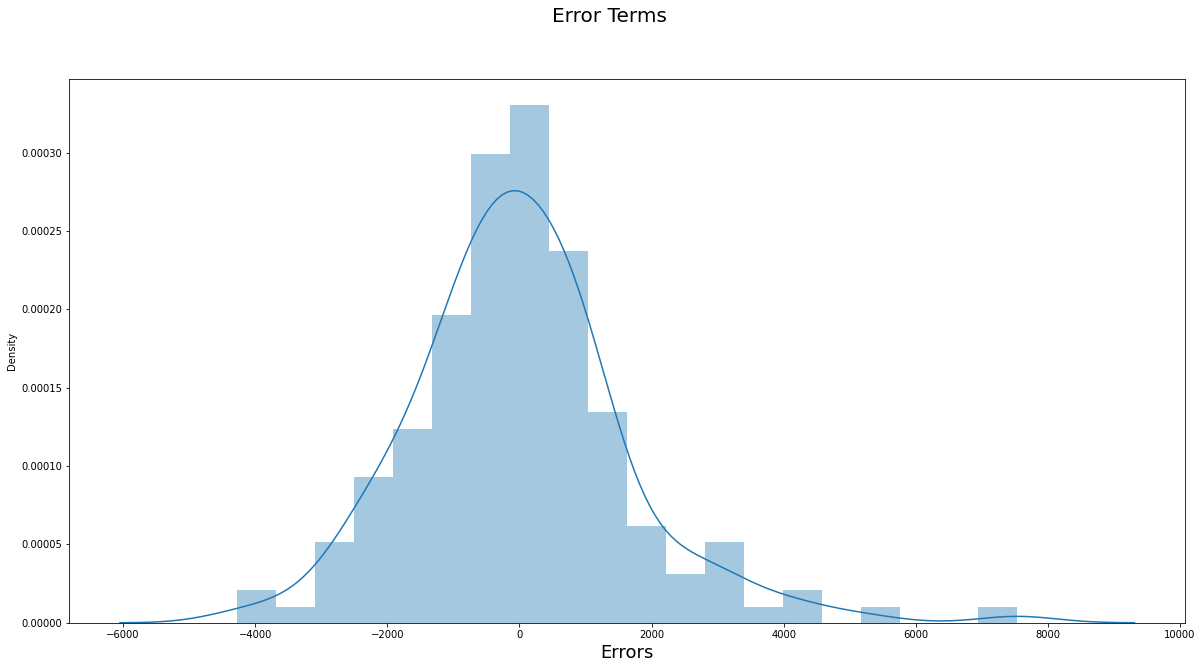

In [291]:
#histogram of error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)    


In [292]:
#prediction
X_train_lm.head()

,const,curbweight,enginesize,stroke,horsepower,peakrpm,averagemileage,audi,bmw,buick,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,1.0,2094,98,3.03,70,4800,42.5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
98,1.0,2008,97,3.29,69,5200,34.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
127,1.0,2756,194,2.90,207,5900,21.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
47,1.0,4066,258,4.17,176,4750,17.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
91,1.0,1918,97,3.29,69,5200,34.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [301]:
X_test_m4 = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [302]:
X_test_m4 = X_test_m4.drop(['compressionratio','boreratio'],axis='columns')

In [305]:
Y_predict_m4 = lr_4.predict(X_test_m4)

Text(0, 0.5, 'Y_pred')

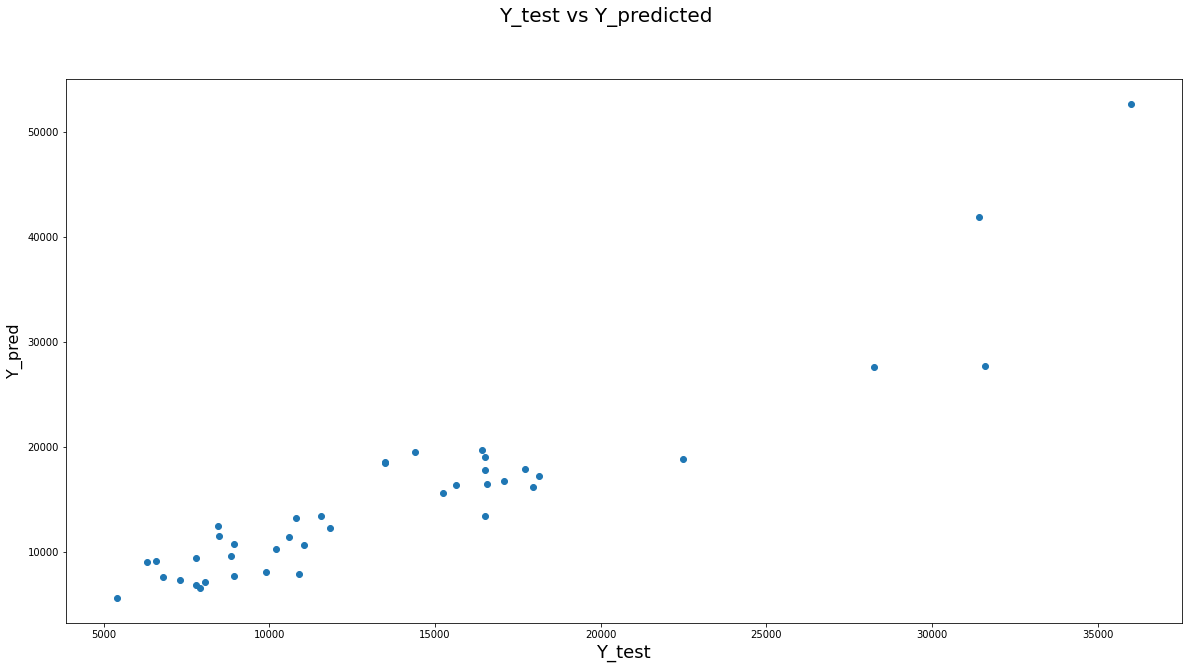

In [307]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_predict_m4)
fig.suptitle('Y_test vs Y_predicted', fontsize = 20)              
plt.xlabel('Y_test', fontsize = 18)                          
plt.ylabel('Y_pred', fontsize = 16)      